# **House Pricing Forecast**

This notebook is aimed at solving the problem of predicting the actual value of houses in the Australian market. This is done using a regression model with regularization techniques to solve the problem of overfitting

In [ ]:
##Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
## Read the dataset

url = "https://raw.githubusercontent.com/adiraptor/house_pricing_assignment/main/data/train.csv"
housing_df = pd.read_csv(url)
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **EDA**

Performing data cleaning, manipulation and exploratory analysis on the dataset


In [ ]:
##Taking a peek at the dataset

housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### **Handling Missing Values**

In [ ]:
def calc_missing_values():
    count_not_missing = 0

    for col in housing_df.columns:
        n_miss =  housing_df[[col]].isna().sum()
        if int(n_miss) == 0:
          n_miss = housing_df[[col]].isnull().sum()
        perc = n_miss / housing_df.shape[0] * 100
        if int(n_miss) > 0:
          print('-> %s, Missing: %d (%.1f%%)' % (col, n_miss, perc))
        else:
          count_not_missing+=1
    
    if count_not_missing == housing_df.columns.size:
      print('No missing values in dataframe')
    

In [ ]:
##Calulate no of null values for each column

calc_missing_values()

-> LotFrontage, Missing: 259 (17.7%)
-> Alley, Missing: 1369 (93.8%)
-> MasVnrType, Missing: 8 (0.5%)
-> MasVnrArea, Missing: 8 (0.5%)
-> BsmtQual, Missing: 37 (2.5%)
-> BsmtCond, Missing: 37 (2.5%)
-> BsmtExposure, Missing: 38 (2.6%)
-> BsmtFinType1, Missing: 37 (2.5%)
-> BsmtFinType2, Missing: 38 (2.6%)
-> Electrical, Missing: 1 (0.1%)
-> FireplaceQu, Missing: 690 (47.3%)
-> GarageType, Missing: 81 (5.5%)
-> GarageYrBlt, Missing: 81 (5.5%)
-> GarageFinish, Missing: 81 (5.5%)
-> GarageQual, Missing: 81 (5.5%)
-> GarageCond, Missing: 81 (5.5%)
-> PoolQC, Missing: 1453 (99.5%)
-> Fence, Missing: 1179 (80.8%)
-> MiscFeature, Missing: 1406 (96.3%)


Firstly, by reading the data description, I realized that the columns Alley, Basement quality, GarageType etc. all have categorical labels called 'NA', which pandas has recognized as null values. 

Hence I have replaced all the NA values in those columns by 'None', so it becomes a category.

In [ ]:
##Read the dataset again using a custom na filter

na_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in na_columns:
    housing_df[col] = housing_df[col].fillna('None')

In [ ]:
## Recalculating missing values
calc_missing_values()

-> LotFrontage, Missing: 259 (17.7%)
-> MasVnrType, Missing: 8 (0.5%)
-> MasVnrArea, Missing: 8 (0.5%)
-> Electrical, Missing: 1 (0.1%)
-> GarageYrBlt, Missing: 81 (5.5%)


This gives a much more valid idea of missing values in the dataset

## Missing Value Treatment

Now before imputing or removing data from any of these columns I will attempt to look at the data description to make sense of what the missing value may imply 




#### Lot Frontage

The missing values do not have any common indicators or dependencies on either observed or predictor variables in the dataset. Hence, I will regard them as Data Missing Completely at Random (MCAR).

For deciding strategy of imputation, drawing a box plot on the LotFrontage column.

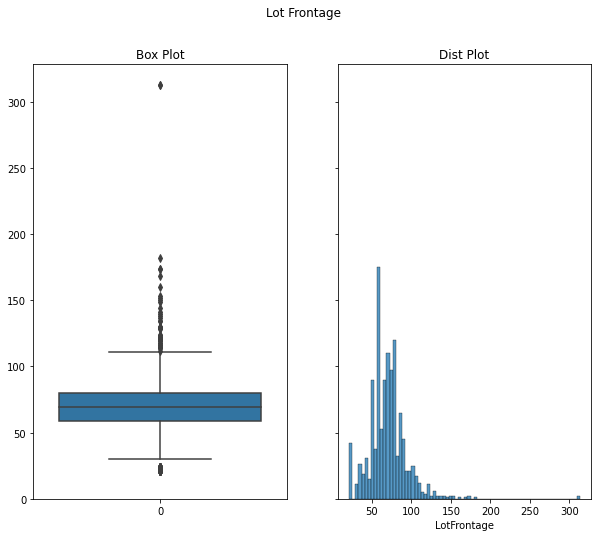

In [ ]:
#Using seaborn to plot LotFrontage

fig, axes = plt.subplots(1,2,figsize = (10,8), sharey = True)
fig.suptitle('Lot Frontage')

axes[0].set_title('Box Plot')
axes[1].set_title('Dist Plot')

sns.boxplot(ax=axes[0], data=housing_df['LotFrontage'])
sns.histplot(ax=axes[1], data =housing_df['LotFrontage'])

Here, since the plot appears to be slighlty right-skewed it makes better sense to impute the values with the median rather than the mean, since the outliers will affect the mean

In [ ]:
#Filling the column with median

housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [ ]:
calc_missing_values()

-> MasVnrType, Missing: 8 (0.5%)
-> MasVnrArea, Missing: 8 (0.5%)
-> Electrical, Missing: 1 (0.1%)
-> GarageYrBlt, Missing: 81 (5.5%)


Thus, the Lot Frontage imputation is done.

#### MasVnrType and MasVnrArea

For the masonry veneer type and area, the rows which are NA also have a lot of the additional feature variables such as PoolQC, Fence and Misc Features as None, so I can safely assume the Masonry veneer type to be none as well. Hence, imputing these as None and 0 respectively.


In [ ]:
# Replacing NA with None

housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna('None')
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(0)

calc_missing_values()

-> Electrical, Missing: 1 (0.1%)
-> GarageYrBlt, Missing: 81 (5.5%)


#### Electrical

Since there is only one missing values, imputing it with mode



In [ ]:
housing_df['Electrical'] = housing_df['Electrical'].fillna(str(housing_df['Electrical'].mode()))
calc_missing_values()

-> GarageYrBlt, Missing: 81 (5.5%)


#### Garage Year Built

In [ ]:
housing_df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

Since the Garage year built is a year column, it doesnt make sense to treat it as a numerical column. Also, all the NA values in the column correspond to those houses which do not have garages.<br/> Hence, I have to convert this column into a categorical one using time periods (year_start - year_end) with **None** as one of the categories.   

In [ ]:
# Converting into categorical column based on year

def get_time_period(year):

  if pd.isna(year):
    return year
  
  else:
    year_start = (year//10)*10
    return str(int(year_start)) + "-" + str(int(year_start) + 10)

housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].map(get_time_period)

In [ ]:
housing_df['GarageYrBlt'].value_counts()

2000-2010    399
1990-2000    196
1970-1980    186
1960-1970    185
1950-1960    151
1980-1990     95
None          81
1940-1950     55
1920-1930     51
1930-1940     41
1910-1920     14
1900-1910      3
2010-2020      3
Name: GarageYrBlt, dtype: int64

In [ ]:
#Replacing all NA's with None

housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna('None')
calc_missing_values()

No missing values in dataframe


All the missing values in the dataset have now been handled

## **Data Analysis**

Heatmap to understand correlation

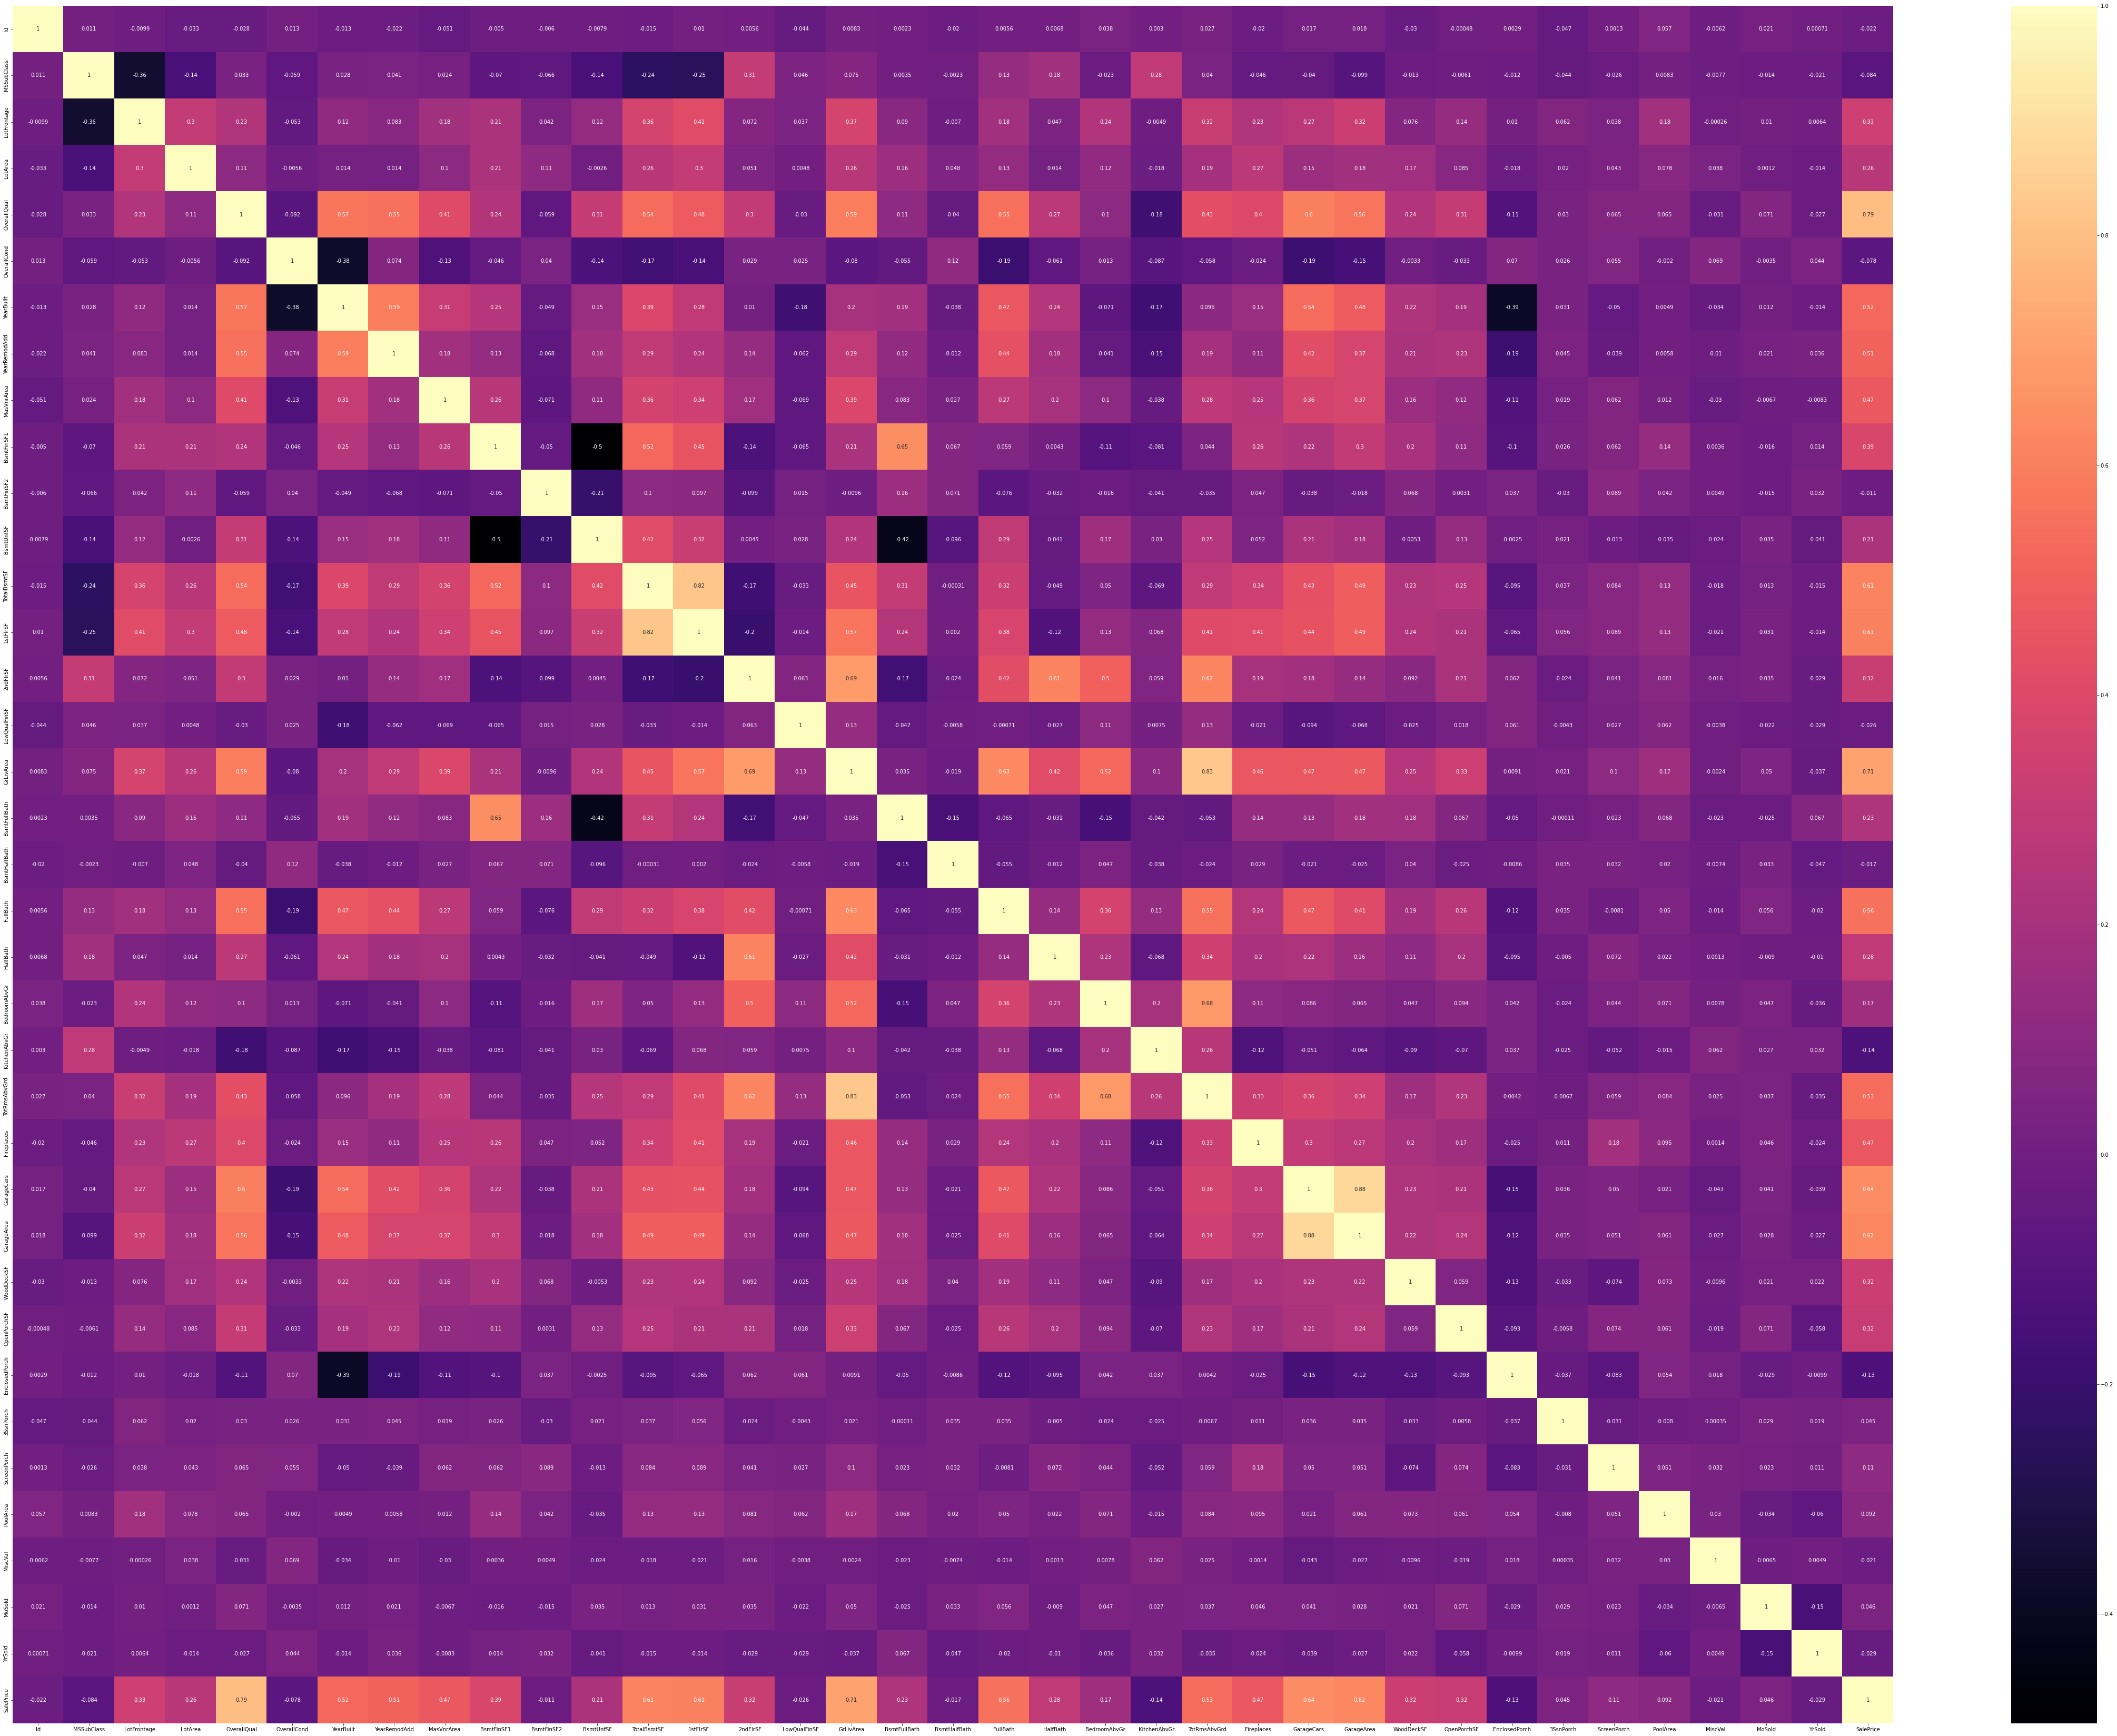

In [ ]:
fig, ax = plt.subplots(figsize=(80,60))
sns.heatmap(housing_df.corr(), annot=True, cmap='magma', ax = ax)

Also, plotting pair plots for numeric variables to determine linear relationship between perdictor and target variables

In [ ]:
#Selecting numeric columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = housing_df.select_dtypes(include = numerics)

In [ ]:
# Plotting pair plots



Error in callback <function flush_figures at 0x7f76da316f80> (for post_execute):


KeyboardInterrupt: ignored